## 1.4.13 Hough Line Transform

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [16]:
img = cv2.imread('dsu7.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,150,200,apertureSize = 3)

(Text(0.5,1,'Edges Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

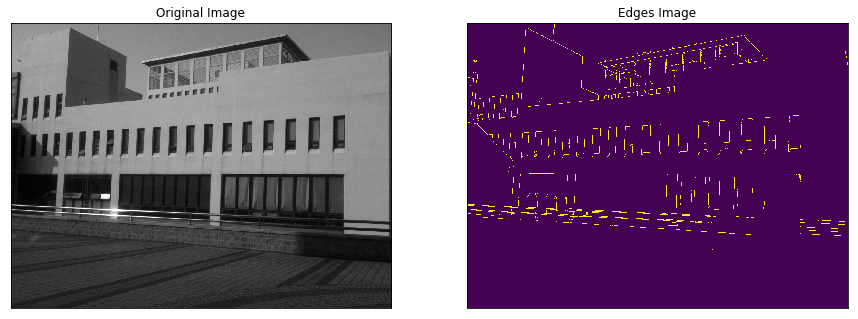

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges)
plt.title('Edges Image'), plt.xticks([]), plt.yticks([])

In [26]:
lines.shape[0]

25

In [27]:
lines

array([[[  10,  503,  664,  537]],

       [[   8,  505,  662,  540]],

       [[1016,  572, 1016,  143]],

       [[ 109,  407,  611,  407]],

       [[   1,  489,  668,  523]],

       [[ 538,  408,  894,  408]],

       [[ 387,  545,  764,  571]],

       [[ 309,  119,  743,   34]],

       [[   8,  492,  312,  507]],

       [[   4,  490,  188,  499]],

       [[ 309,  129,  758,   50]],

       [[ 160,   15,  500,  188]],

       [[ 260,  501,  527,  514]],

       [[  10,  244,  557,  186]],

       [[ 895,  567,  895,  338]],

       [[ 144,  222,  158,   15]],

       [[ 119,  503,  375,  512]],

       [[ 534,  542,  542,  286]],

       [[ 560,  556,  570,  271]],

       [[ 536,  513,  795,  526]],

       [[ 285,  539,  298,  287]],

       [[  96,  357,  868,  344]],

       [[ 307,  164,  807,  102]],

       [[ 239,  536,  495,  553]],

       [[  68,  307,  894,  250]]], dtype=int32)

In [21]:
lines = cv2.HoughLines(edges,1,np.pi/180,150)
for i in range(lines.shape[0]):
    for rho,theta in lines[i]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    
#cv2.imwrite('houghlines3.jpg',img)

(Text(0.5,1,'Result Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

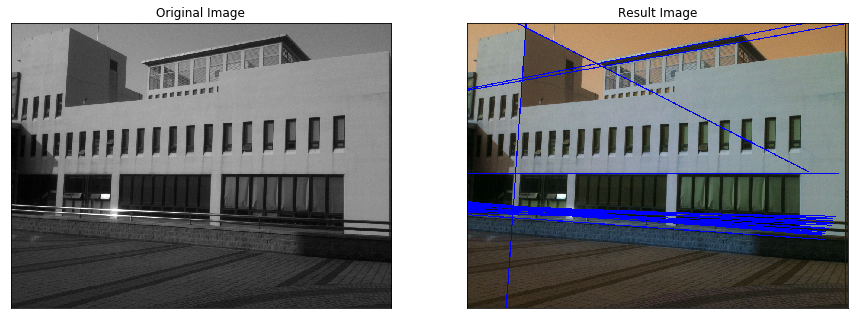

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(gray,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img)
plt.title('Result Image'), plt.xticks([]), plt.yticks([])

In [23]:
def nothing(x):
    pass

In [24]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 100, 500, nothing)
cv2.createTrackbar('number', 'image', 1, 100, nothing)
font = cv2.FONT_HERSHEY_SIMPLEX
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    number = cv2.getTrackbarPos('number', 'image')
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)
    img_rgb = cv2.imread('dsu7.jpg')
    numbers = number
    if(lines.shape[0]<number):
        numbers = lines.shape[0]
    msg = "numbers:"+str(lines.shape[0])  
    cv2.putText(img_rgb, msg, (10, 30), font, 0.5, (255,255,255), 1, cv2.LINE_AA)    
    for i in range(numbers):
        for rho,theta in lines[i]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
            cv2.line(img_rgb,(x1,y1),(x2,y2),(0,0,255),2)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()

### Probabilistic Hough Transform

In [25]:
cv2.namedWindow('image')
cv2.createTrackbar('minLineLength', 'image', 1, 500, nothing)
cv2.createTrackbar('maxLineGap', 'image', 1, 500, nothing)
cv2.createTrackbar('number', 'image', 1, 500, nothing)
font = cv2.FONT_HERSHEY_SIMPLEX
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    lineLength = cv2.getTrackbarPos('minLineLength', 'image')
    lineGap = cv2.getTrackbarPos('maxLineGap', 'image')
    number = cv2.getTrackbarPos('number', 'image')
    lines = cv2.HoughLinesP(edges,rho = 1,theta = np.pi/180,threshold = 100,minLineLength = lineLength,maxLineGap = lineGap)
    
    img_rgb = cv2.imread('dsu7.jpg')
    numbers = number
    if(lines.shape[0]<number):
        numbers = lines.shape[0]
    msg = "numbers:"+str(lines.shape[0])+"minLineLength:"+str(lineLength)  
    cv2.putText(img_rgb, msg, (10, 30), font, 0.5, (255,255,255), 1, cv2.LINE_AA)    
    for i in range(numbers):
        for x1,y1,x2,y2 in lines[i]:
            cv2.line(img_rgb,(x1,y1),(x2,y2),(0,255,0),2)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()